In this exercise, you'll predict house prices using your model. To complete this assessment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Load the houseprices data from Thinkful's database.
1. Split your data into train and test sets.
1. Estimate your model from the previous lesson in the training set. Assess the goodness of fit of your model.
1. Predict the house prices in the test set, and evaluate the performance of your model using the metrics previously mentioned in this lesson.
1. Is the performance of your model satisfactory? Why or why not?
1. Try to improve your model in terms of predictive performance by adding or removing some variables.

Submit a link to your Notebook at the end of this assessment, after you answer a few questions related to your model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sqlalchemy import create_engine
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Load the houseprices data from Thinkful's database.

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, because you're only doing a single query.
engine.dispose()

house_df.info()
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### 2. Split your data into train and test sets.

In [4]:
Y = house_df['saleprice']

# For the feature set, I want to make an interaction between `lotarea` and `overallqual`.
house_df['lotarea_overallqual'] = house_df.lotarea * house_df.overallqual

X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

The number of observations in the training set: 1095
The number of observations in the test set: 365


### 3. Estimate your model from the previous lesson in the training set. Assess the goodness of fit of your model.

In [6]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     639.9
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          3.63e-284
Time:                        10:17:47   Log-Likelihood:                -13220.
No. Observations:                1095   AIC:                         2.645e+04
Df Residuals:                    1090   BIC:                         2.648e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.292e+05   1

* The R-squared and adjusted R-squared shows no change, which shows that my model has randomly selected the training set. However, the values show room for improvement, because only 70.1% of my variance are explained. 
* The F-statistic has decreased its values; however,the p-value in relation to th eF-statistic is still below 0.05. This tells me that the features that I've selected are adding information compared to the reduced model, and my model is useful in explaining the sale price. 
* Both AIC and BIC information criteria values decreased compared to the last model (AIC was 35330 and BIC was 35360), which means the current model is a better representation than the last model. 

### 4. Predict the house prices in the test set, and evaluate the performance of your model using the metrics previously mentioned in this lesson.

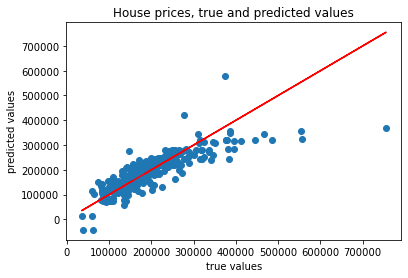

Mean absolute error of the prediction: 29917.65473453383
Mean squared error of the prediction: 2198182314.259
Root mean squared error of the prediction: 46884.77699913907
Mean absolute percentage error of the prediction: 17.047031183129874


In [7]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))

The model seems to predict values to be lower than the true values, especially for the houses with outlier prices.
* Lower values are desirable for all four metrics. The lower the value, the better the performance of the model.
* MAE, MSE, and RMSE are in the unit of the target variable, but MAPE is unitless. So MAE, SME, and RMSE are only useful if you compare different models that have the same target variable.
* MSE and RMSE penalize large errors more than MAE and MAPE do. This means that MSE and RMSE are more useful when high error values are undesirable.
* For target values very closely to zero, MAPE may provide a problematic picture of the performance because the ratio may go to very high values, and this may distort the average. It can also give divide-by-zero errors if some values of the target are zero.

### 5. Is the performance of your model satisfactory? Why or why not?
It is satisfactory to a certain degrees, but the model can always improve better. the model seems to predict the value well in the range between 50,000 and 300,000, based on the dots being close to the red line. However, the MAE, MSE, and RSME all show that the data has room for improvement.

### 6. Try to improve your model in terms of predictive performance by adding or removing some variables.

The number of observations in the training set: 1095
The number of observations in the test set: 365
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     437.8
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          5.43e-286
Time:                        10:39:33   Log-Likelihood:                -13209.
No. Observations:                1095   AIC:                         2.643e+04
Df Residuals:                    1088   BIC:                         2.647e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------

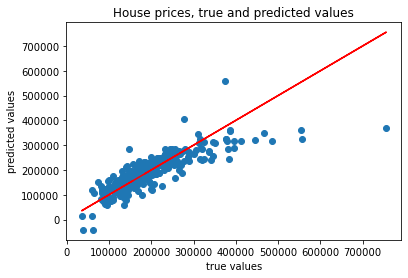

Mean absolute error of the prediction: 29883.949135044808
Mean squared error of the prediction: 2160205822.5175014
Root mean squared error of the prediction: 46478.01439947173
Mean absolute percentage error of the prediction: 17.082157213638478


In [9]:
Y = house_df['saleprice']
X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual', 'mssubclass', 'overallcond']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))

The number of observations in the training set: 1095
The number of observations in the test set: 365
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     525.7
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          2.71e-287
Time:                        10:40:32   Log-Likelihood:                -13210.
No. Observations:                1095   AIC:                         2.643e+04
Df Residuals:                    1089   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------

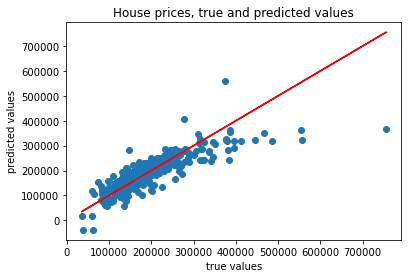

Mean absolute error of the prediction: 29885.387656694875
Mean squared error of the prediction: 2159735305.287504
Root mean squared error of the prediction: 46472.952405539116
Mean absolute percentage error of the prediction: 17.057639487074727


In [10]:
Y = house_df['saleprice']
X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual', 'mssubclass']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))

### This model below turned out to be the best model yet.

The number of observations in the training set: 1095
The number of observations in the test set: 365
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     442.8
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          7.25e-288
Time:                        10:42:32   Log-Likelihood:                -13205.
No. Observations:                1095   AIC:                         2.642e+04
Df Residuals:                    1088   BIC:                         2.646e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------

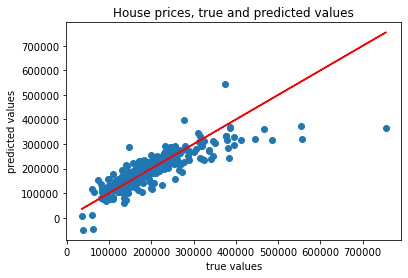

Mean absolute error of the prediction: 29727.582985425317
Mean squared error of the prediction: 2146376075.479504
Root mean squared error of the prediction: 46328.998213640494
Mean absolute percentage error of the prediction: 17.05768350371097


In [11]:
house_df['mssubclass_overallqual'] = house_df.mssubclass * house_df.overallqual

Y = house_df['saleprice']
X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual', 'mssubclass', 'mssubclass_overallqual']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))

The number of observations in the training set: 1095
The number of observations in the test set: 365
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     529.3
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          1.95e-288
Time:                        10:43:05   Log-Likelihood:                -13207.
No. Observations:                1095   AIC:                         2.643e+04
Df Residuals:                    1089   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------

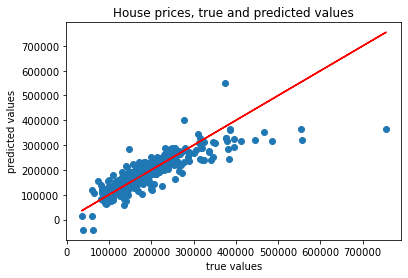

Mean absolute error of the prediction: 29835.658271174612
Mean squared error of the prediction: 2151022963.8527536
Root mean squared error of the prediction: 46379.12206858549
Mean absolute percentage error of the prediction: 17.061382256396744


In [12]:
Y = house_df['saleprice']
X = house_df[['overallqual', 'garagecars', 'yearremodadd', 'lotarea_overallqual', 'mssubclass_overallqual']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 22)

print("The number of observations in the training set: {}".format(X_train.shape[0]))
print("The number of observations in the test set: {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('House prices, true and predicted values')
plt.show()

print("Mean absolute error of the prediction: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction: {}".format(np.mean(np.abs((y_test - y_preds)/y_test))*100))